# Linear Regression

 **Scenario**
> A waiter recorded information about each tip he received over a few months of working in one restaurant. In all, he recorded 244 tips. Can we predict the tip amount?

The Information that was collected by waiter are:
- 'total_bill',
- 'tip',
- 'sex',
- 'smoker',
- 'day',
- 'time',
- 'size'

**What we want to estimate is the tip amount waiter can recieve if these factors are considered**





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [29]:
tips.shape

(244, 7)

In [27]:
tips.isnull().value_counts().sum()

244

#### No null values in given data
#### Let's visualise the above data in different scenarios

C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_bill', ylabel='Density'>

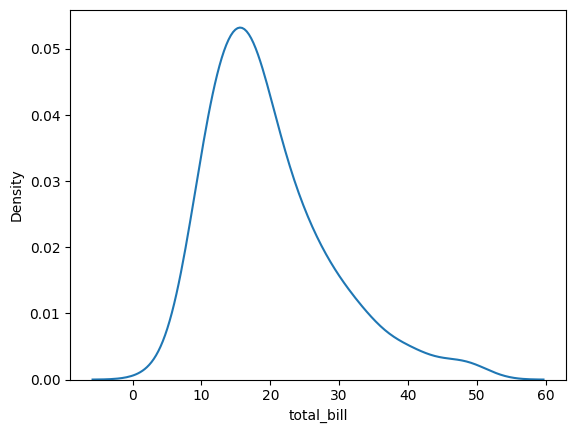

In [5]:
sns.kdeplot(data=tips, x="total_bill")

C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The de

<Axes: xlabel='total_bill', ylabel='Density'>

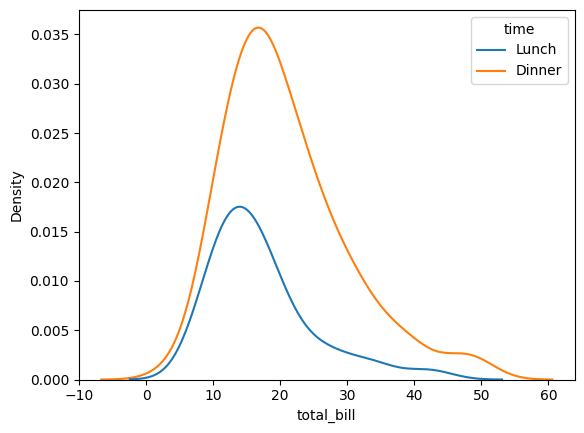

In [6]:
sns.kdeplot(data=tips, x="total_bill", hue="time")

C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The de

<Axes: xlabel='total_bill', ylabel='Density'>

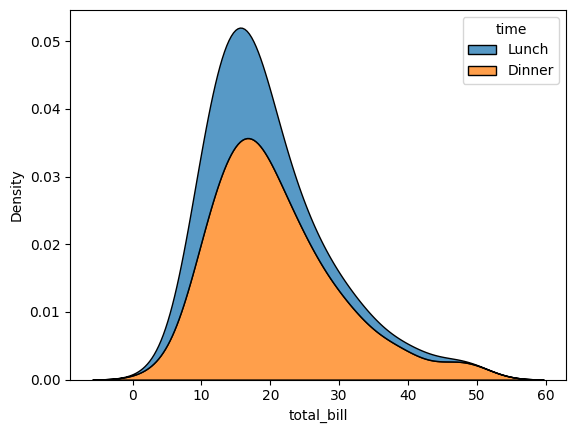

In [7]:
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="stack")

C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='total_bill', ylabel='tip'>

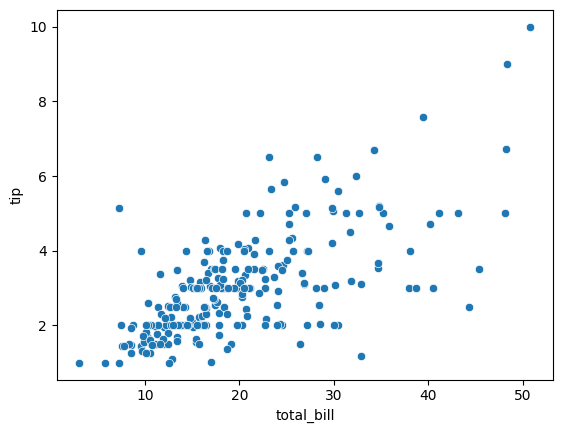

In [8]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='total_bill', ylabel='tip'>

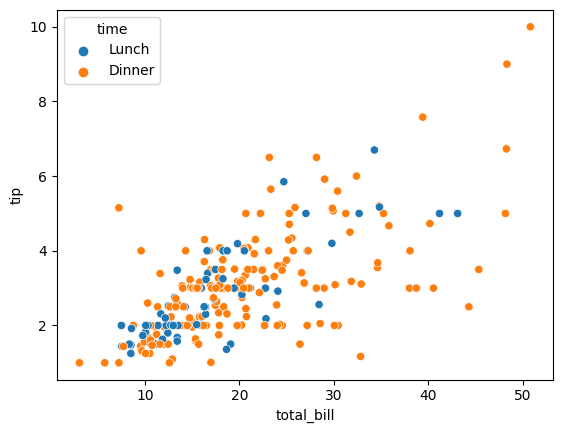

In [9]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

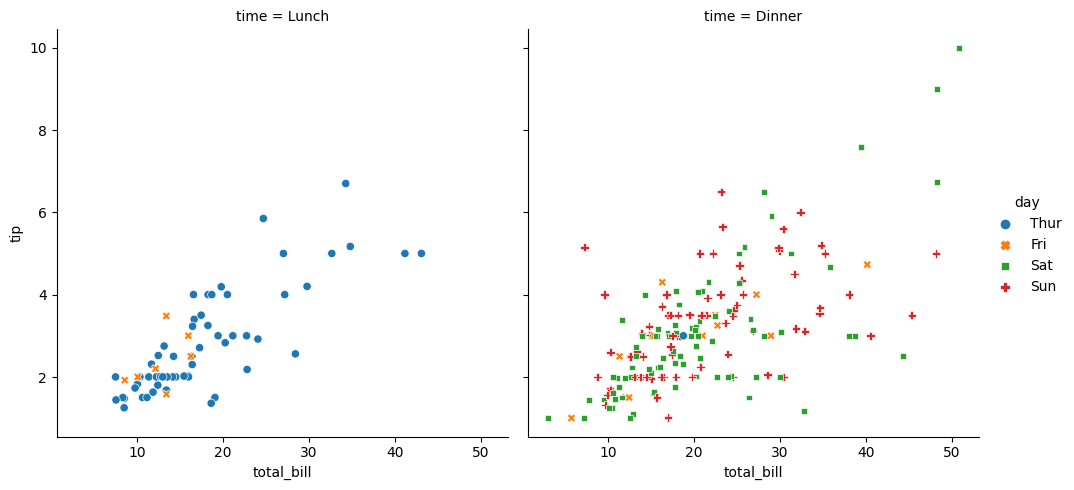

In [18]:
sns.relplot(data=tips, x="total_bill", y="tip",
    col="time", hue="day", style="day",
    kind="scatter"
)

C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='total_bill', ylabel='tip'>

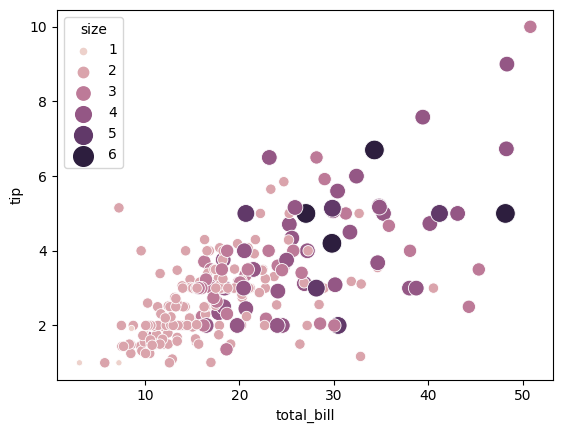

In [11]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), legend="full"
)

C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

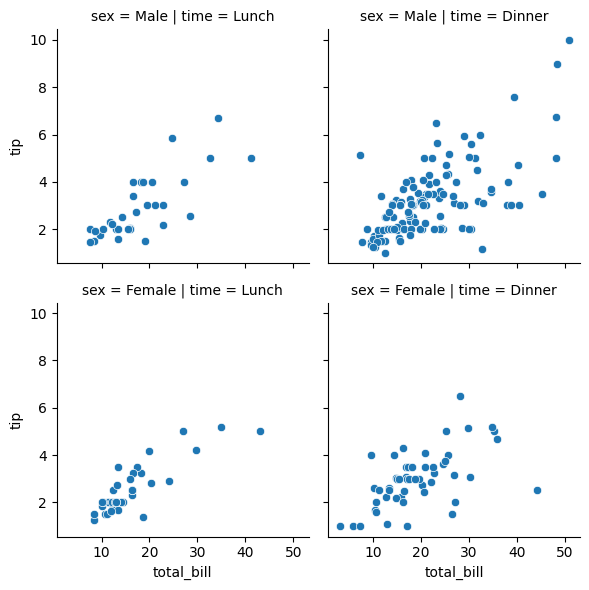

In [12]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

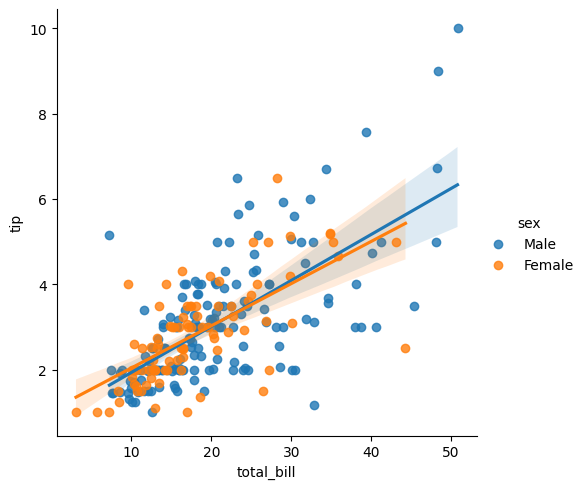

In [20]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="sex")

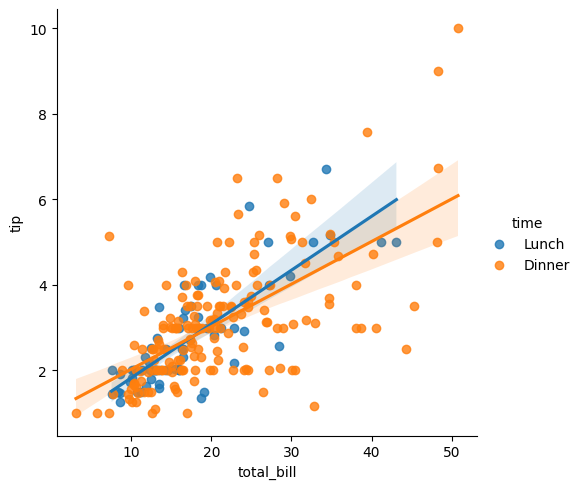

In [21]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="time")

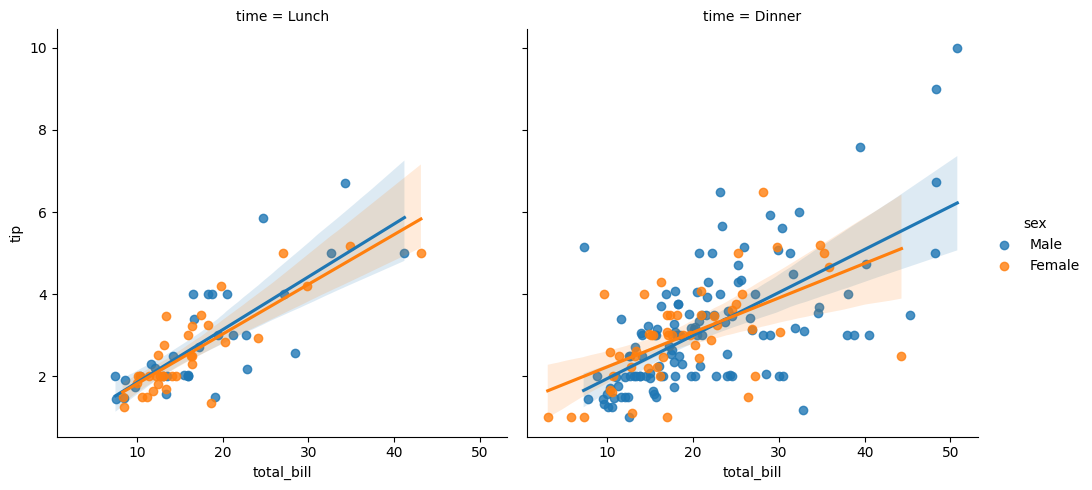

In [24]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="sex", col="time")

**Now that we have done a basic EDA, let's move to model building aspect.
Machine learning is all about learning from data.**


In [33]:
y = tips['tip']
X = tips['total_bill']
X = np.array(X).reshape(-1,1)


In [39]:
from sklearn import linear_model
reg= linear_model.LinearRegression()

In [40]:
reg.fit(X,y)

LinearRegression()

In [41]:
reg.coef_


array([0.10502452])

In [42]:

reg.intercept_

0.9202696135546731

Let's try doing some prediction with this.

In [43]:
tips[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
# Predicting for multiple sample
reg.predict(np.array(tips['total_bill'][:5]).reshape(-1,1))

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ])

In [45]:
y_pred = reg.predict(np.array(tips['total_bill']).reshape(-1,1))

In [46]:
# Predicting for one sample
reg.predict(np.array(16.99).reshape(1,-1))

array([2.70463616])

In [49]:
import plotly.express as px
df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)

In [53]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, df.tip)

LinearRegression()

In [54]:
x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

In [66]:
import plotly.graph_objects as go
plt = px.scatter(df, x='total_bill', y='tip', opacity=0.65)
plt.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
plt.show()

In [63]:
# import evaluation metrics  from sklearn library
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# R2 score which lies between 0 to 1. close to 1 score shows better a fit model
print("R2 Score")
r2 = r2_score(y,y_pred)
print(r2)

# mean square error
print("Mean Square Error")
mse = mean_squared_error(y,y_pred)
print(mse)

print("Root Mean Square Error")
rmse = np.sqrt(mean_squared_error(y,y_pred))
print(rmse)

# Mean Absolute Error
print("Mean Absolute Error")
mae = mean_absolute_error(y,y_pred)
print(mae)

R2 Score
0.45661658635167657
Mean Square Error
1.036019442011377
Root Mean Square Error
1.0178504025697377
Mean Absolute Error
0.7458253894586339


C:\Users\AL FARES\AppData\Local\Temp\ipykernel_4312\2009793352.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\AL FARES\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='tip', ylabel='Density'>

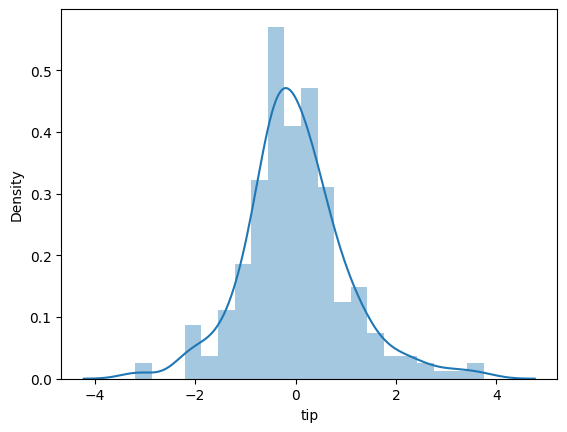

In [64]:
# explore residual
residual = y - y_pred
sns.distplot(residual)

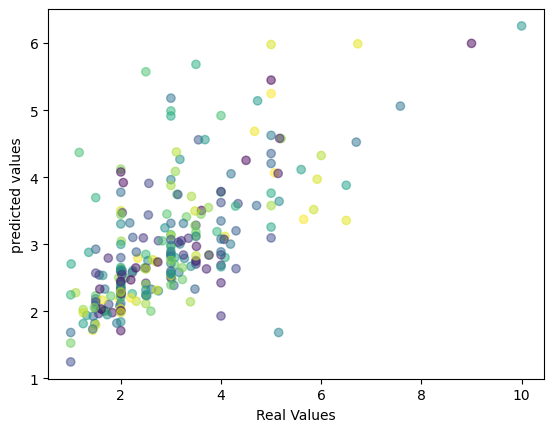

In [83]:
import matplotlib.pyplot as plt
import numpy as np
N = 244
colors = np.random.rand(N)
plt.scatter(y,y_pred, c=colors, alpha=0.5)
plt.xlabel("Real Values")
plt.ylabel("predicted values")
plt.show()

In [84]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = px.data.tips()
X = df.total_bill[:, None]
X_train, X_test, y_train, y_test = train_test_split(X, df.tip, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

# Displaying PolynomialFeatures using $\LaTeX$

Notice how linear regression fits a straight line, but kNN can take non-linear shapes. Moreover, it is possible to extend linear regression to polynomial regression by using scikit-learn's PolynomialFeatures, which lets you fit a slope for your features raised to the power of n, where n=1,2,3,4 in our example.

With Plotly, it's easy to display latex equations in legend and titles by simply adding $ before and after your equation. This way, you can see the coefficients that our polynomial regression fitted.

In [85]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def format_coefs(coefs):
    equation_list = [f"{coef}x^{i}" for i, coef in enumerate(coefs)]
    equation = "$" +  " + ".join(equation_list) + "$"

    replace_map = {"x^0": "", "x^1": "x", '+ -': '- '}
    for old, new in replace_map.items():
        equation = equation.replace(old, new)

    return equation

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

fig = px.scatter(df, x='total_bill', y='tip', opacity=0.65)
for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree)
    poly.fit(X)
    X_poly = poly.transform(X)
    x_range_poly = poly.transform(x_range)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, df.tip)
    y_poly = model.predict(x_range_poly)

    equation = format_coefs(model.coef_.round(2))
    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=equation))

fig.show()